In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import scipy.stats as stat
import scipy as sp
import statistics

from datetime import datetime
from datetime import  date

import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Modèle de ML
from sklearn import linear_model

# data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Outils score et evaluation de modèle
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score

# Outils optmisation de modèle
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("dataset_birth_codeP.csv", sep = ",")
df.head()

,DateMandatInstant,DateMandatSeason,DateMandatYear,DateMandatMonth,DateMandatWeek,MandatId,UrlMandat,DateMandat,StatutMandat,DateCompromis,BudgetMaxEuro,TypeBien,TypeProjet,SurfaceMin,NombrePieces,NombreChambres,Ville,CodePostal,Departement,Region,NombreDeBiensTrouves,NombreDeBiensPublies,NombreDeBiensSelectionnes,NombreDeBiensAVisiter,NombreDeBiensVisites,NombreDeBiensRejetes,NombreDeBiensActesOuCompromis,DatePremierePublicationDeBien,DateDernierePublicationDeBien,DelaiPremierePublicationDeBien,DatePremiereVisite,DelaiPremiereVisite,DateNaissanceClient,CodePostalClient
0,1,2,0,4,17,2,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-26,Mandat perdu,NaN,280000,Maison,Résidence principale,0,5,2,Nimes,30000,Gard,Languedoc-Roussillon,39,32,5,4,1,18,0,2012-05-21,2015-10-09,25.0,NaN,NaN,1981-09-07,34000
1,1,2,0,4,17,2,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-26,Mandat perdu,NaN,280000,Maison,Résidence principale,0,5,2,Montpellier,34000,Hérault,Languedoc-Roussillon,39,32,5,4,1,18,0,2012-05-21,2015-10-09,25.0,NaN,NaN,1981-09-07,34000
2,1,2,0,4,17,3,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-26,Lead perdu,NaN,300000,Appartement,Résidence principale,70,3,2,Montpellier,34000,Hérault,Languedoc-Roussillon,2,1,0,0,0,0,0,2013-03-07,2013-03-07,315.0,NaN,NaN,NaN,34000
3,2,2,0,4,17,5,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-04-27,Mandat perdu,NaN,250000,Appartement,Investissement,60,3,2,Montpellier,34000,Hérault,Languedoc-Roussillon,18,17,2,0,1,11,0,2012-05-03,2014-11-18,6.0,NaN,NaN,1972-12-13,34820
4,7,2,0,5,18,12,https://monespace.net-acheteur.com/Spa/app/#/m...,2012-05-02,Lead perdu,NaN,250000,Maison,Résidence principale,80,4,3,Frontignan,34110,Hérault,Languedoc-Roussillon,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51817 entries, 0 to 51816
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DateMandatInstant               51817 non-null  int64  
 1   DateMandatSeason                51817 non-null  int64  
 2   DateMandatYear                  51817 non-null  int64  
 3   DateMandatMonth                 51817 non-null  int64  
 4   DateMandatWeek                  51817 non-null  int64  
 5   MandatId                        51817 non-null  int64  
 6   UrlMandat                       51817 non-null  object 
 7   DateMandat                      51817 non-null  object 
 8   StatutMandat                    51817 non-null  object 
 9   DateCompromis                   6645 non-null   object 
 10  BudgetMaxEuro                   51817 non-null  int64  
 11  TypeBien                        51817 non-null  object 
 12  TypeProjet                      

In [7]:
# drop colonne
# transfo data
# suppr valeur nulle
# recup csv

In [8]:
df.drop(["UrlMandat", "DatePremierePublicationDeBien", "DateDernierePublicationDeBien", "DelaiPremierePublicationDeBien", "DatePremiereVisite", "DelaiPremiereVisite", "CodePostalClient"], axis = 1, inplace = True)

In [1]:
df.head(5)

NameError: name 'df' is not defined

In [6]:
df["DateMandat"].max()

'2021-07-23'

In [10]:
indexNames = df[df['StatutMandat'] == 'Lead perdu'].index
df.drop(indexNames, inplace = True)

In [11]:
df['StatutMandat'].replace("Mandat perdu",0 ,inplace=True)
df['StatutMandat'].replace("Entrée dans les lieux",1 ,inplace=True)
df['StatutMandat'].replace("Preparation de l'acte",1 ,inplace=True)

df['TypeBien'].replace("Appartement",0 ,inplace=True)
df['TypeBien'].replace("Maison",1 ,inplace=True)
df['TypeBien'].replace("Maison ou appartement",2 ,inplace=True)
df['TypeBien'].replace("Immeuble",3 ,inplace=True)
df['TypeBien'].replace("Studio",4 ,inplace=True)
df['TypeBien'].replace("Terrain",5 ,inplace=True)
df['TypeBien'].replace("Local",6 ,inplace=True)
df['TypeBien'].replace("Autre",7 ,inplace=True)

df['TypeProjet'].replace("Résidence principale",0 ,inplace=True)
df['TypeProjet'].replace("Investissement",1 ,inplace=True)
df['TypeProjet'].replace("Résidence secondaire",2 ,inplace=True)

df["NombreChambres"].replace("6+", 6, inplace = True)
df["NombreChambres"] = df["NombreChambres"].astype(int)

df["NombrePieces"].replace("6+", 6, inplace = True)
df["NombrePieces"] = df["NombrePieces"].astype(int)

In [12]:
df['DateMandat'] = pd.to_datetime(df['DateMandat'])
df['DateNaissanceClient'] = pd.to_datetime(df['DateNaissanceClient'], errors = 'coerce')
df['DateNaissanceClient'] = pd.to_datetime(df['DateNaissanceClient'])
df['MandatYear'] = df['DateMandat'].dt.year 
df["ClientYear"] = df["DateNaissanceClient"].dt.year
df['ClientYear'] = df['ClientYear'].fillna(0)
df["ClientYear"]=df["ClientYear"].astype(int)
df["AgeClient"] = df["MandatYear"] - df["ClientYear"]

In [13]:
df["Ville"] = df["Ville"].astype(str)
df["Departement"] = df["Departement"].astype(str)
df["Region"] = df["Region"].astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23055 entries, 0 to 51779
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DateMandatInstant              23055 non-null  int64         
 1   DateMandatSeason               23055 non-null  int64         
 2   DateMandatYear                 23055 non-null  int64         
 3   DateMandatMonth                23055 non-null  int64         
 4   DateMandatWeek                 23055 non-null  int64         
 5   MandatId                       23055 non-null  int64         
 6   DateMandat                     23055 non-null  datetime64[ns]
 7   StatutMandat                   23055 non-null  int64         
 8   DateCompromis                  6645 non-null   object        
 9   BudgetMaxEuro                  23055 non-null  int64         
 10  TypeBien                       23055 non-null  int64         
 11  TypeProjet     

In [15]:
df = df.astype({col: 'int32' for col in df.select_dtypes('int64').columns})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23055 entries, 0 to 51779
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DateMandatInstant              23055 non-null  int32         
 1   DateMandatSeason               23055 non-null  int32         
 2   DateMandatYear                 23055 non-null  int32         
 3   DateMandatMonth                23055 non-null  int32         
 4   DateMandatWeek                 23055 non-null  int32         
 5   MandatId                       23055 non-null  int32         
 6   DateMandat                     23055 non-null  datetime64[ns]
 7   StatutMandat                   23055 non-null  int32         
 8   DateCompromis                  6645 non-null   object        
 9   BudgetMaxEuro                  23055 non-null  int32         
 10  TypeBien                       23055 non-null  int32         
 11  TypeProjet     

In [17]:
df["DateMandatInstant"].value_counts()

3240    127
3246     88
3303     73
2753     72
3211     65
       ... 
1514      1
996       1
3013      1
1658      1
2047      1
Name: DateMandatInstant, Length: 2041, dtype: int64

In [18]:
df["DateMandatSeason"].value_counts()

1    6895
2    5804
4    5665
3    4691
Name: DateMandatSeason, dtype: int64

In [19]:
df["DateMandatYear"].value_counts()

8    6415
7    5380
9    3763
6    2735
5    1615
4    1412
3     894
2     541
1     230
0      70
Name: DateMandatYear, dtype: int64

In [20]:
df["DateMandatMonth"].value_counts()

3     2476
2     2391
1     2383
10    2188
9     2091
5     2005
6     1949
4     1813
11    1705
7     1465
12    1461
8     1128
Name: DateMandatMonth, dtype: int64

In [21]:
df["DateMandatWeek"].value_counts()

5     709
11    684
7     643
12    622
6     606
42    580
10    569
9     562
41    558
2     549
4     546
38    524
19    523
24    523
3     500
26    497
37    497
8     495
23    491
40    489
17    484
21    478
39    474
16    468
45    461
43    452
14    443
50    443
20    432
36    427
27    426
13    415
18    409
48    409
25    392
47    391
35    389
49    372
44    365
46    362
22    352
29    334
51    330
28    322
15    319
30    285
34    257
31    253
33    227
52    195
1     187
32    180
53    155
Name: DateMandatWeek, dtype: int64

In [22]:
df["TypeProjet"].value_counts()

0    17025
1     4803
2     1227
Name: TypeProjet, dtype: int64

In [23]:
df["TypeBien"].value_counts()

0    12552
1     7223
2     2263
3      557
4      269
5       86
6       70
7       35
Name: TypeBien, dtype: int64

In [24]:
df["NombrePieces"].value_counts()

2    6381
3    5982
4    5425
5    2518
1    1595
6    1154
Name: NombrePieces, dtype: int64

In [25]:
df["NombreChambres"].value_counts()

1    7953
2    6321
3    5740
4    2347
6     382
5     312
Name: NombreChambres, dtype: int64

In [26]:
df["SurfaceMin"].value_counts()

100    2019
80     1812
60     1696
70     1597
50     1487
       ... 
44        1
71        1
107       1
600       1
87        1
Name: SurfaceMin, Length: 97, dtype: int64

In [27]:
df["StatutMandat"].value_counts()

0    15028
1     8027
Name: StatutMandat, dtype: int64

# Récupération du csv après transfo

In [ ]:
 df.to_csv('Downloads/pred_about/essai.csv')

# Machine Learning

In [28]:
df.head()

,DateMandatInstant,DateMandatSeason,DateMandatYear,DateMandatMonth,DateMandatWeek,MandatId,DateMandat,StatutMandat,DateCompromis,BudgetMaxEuro,TypeBien,TypeProjet,SurfaceMin,NombrePieces,NombreChambres,Ville,CodePostal,Departement,Region,NombreDeBiensTrouves,NombreDeBiensPublies,NombreDeBiensSelectionnes,NombreDeBiensAVisiter,NombreDeBiensVisites,NombreDeBiensRejetes,NombreDeBiensActesOuCompromis,DateNaissanceClient,MandatYear,ClientYear,AgeClient
0,1,2,0,4,17,2,2012-04-26,0,NaN,280000,1,0,0,5,2,Nimes,30000,Gard,Languedoc-Roussillon,39,32,5,4,1,18,0,1981-09-07,2012,1981,31
1,1,2,0,4,17,2,2012-04-26,0,NaN,280000,1,0,0,5,2,Montpellier,34000,Hérault,Languedoc-Roussillon,39,32,5,4,1,18,0,1981-09-07,2012,1981,31
3,2,2,0,4,17,5,2012-04-27,0,NaN,250000,0,1,60,3,2,Montpellier,34000,Hérault,Languedoc-Roussillon,18,17,2,0,1,11,0,1972-12-13,2012,1972,40
7,11,2,0,5,19,17,2012-05-06,0,NaN,400000,1,0,130,5,4,Lattes,34970,Hérault,Languedoc-Roussillon,11,10,3,3,0,1,0,1973-07-17,2012,1973,39
9,26,2,0,5,21,79,2012-05-21,0,NaN,240000,1,0,50,3,2,Poissy,78300,Yvelines,Île-de-France,14,14,0,0,0,12,0,1983-02-03,2012,1983,29


In [29]:
X = df.drop(["MandatId","DateMandat","StatutMandat", "DateCompromis", "Ville", "Departement", "Region", "NombreDeBiensTrouves","NombreDeBiensPublies", "NombreDeBiensSelectionnes", "NombreDeBiensAVisiter", "NombreDeBiensVisites", "NombreDeBiensRejetes", "NombreDeBiensActesOuCompromis", "DateNaissanceClient"],axis = 1)

In [69]:
X.head()

,DateMandatInstant,DateMandatSeason,DateMandatYear,DateMandatMonth,DateMandatWeek,BudgetMaxEuro,TypeBien,TypeProjet,SurfaceMin,NombrePieces,NombreChambres,CodePostal,MandatYear,ClientYear,AgeClient
0,1,2,0,4,17,280000,1,0,0,5,2,30000,2012,1981,31
1,1,2,0,4,17,280000,1,0,0,5,2,34000,2012,1981,31
3,2,2,0,4,17,250000,0,1,60,3,2,34000,2012,1972,40
7,11,2,0,5,19,400000,1,0,130,5,4,34970,2012,1973,39
9,26,2,0,5,21,240000,1,0,50,3,2,78300,2012,1983,29


In [30]:
y = df["StatutMandat"]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0, shuffle = True)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight = "balanced")
from pprint import pprint
pprint("paramètre actuellement utiliés : \n")
pprint(lr.get_params())
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
y_lr = lr.predict(X_test)
# On récupère la prédiction de la valeur positive
y_prob = lr.predict_proba(X_test)[:,1] 

'paramètre actuellement utiliés : \n'
{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
0.5570375189763609


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr,target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.73      0.53      0.62      3021
succès (Class 1)       0.41      0.63      0.50      1590

        accuracy                           0.56      4611
       macro avg       0.57      0.58      0.56      4611
    weighted avg       0.62      0.56      0.57      4611



In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver = 'newton-cg', class_weight = "balanced")
params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

lr_gs = GridSearchCV(lr, params, cv=10)
lr_gs.fit(X_train, y_train)

print(lr_gs.best_params_)
print("accuracy :",lr_gs.best_score_)

y_lr_gs = lr_gs.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr_gs, target_names = ['échec(Class 0)','succès (Class 1)']))

{'C': 0.001, 'penalty': 'l2'}
accuracy : 0.5666358334949944
                  precision    recall  f1-score   support

  échec(Class 0)       0.73      0.55      0.62      3021
succès (Class 1)       0.42      0.61      0.50      1590

        accuracy                           0.57      4611
       macro avg       0.57      0.58      0.56      4611
    weighted avg       0.62      0.57      0.58      4611



### Le meilleur modèle

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_train,y_train))
y_knn = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn, target_names = ['échec(Class 0)','succès (Class 1)']))

0.9233355020602906
                  precision    recall  f1-score   support

  échec(Class 0)       0.89      0.90      0.90      3021
succès (Class 1)       0.81      0.79      0.80      1590

        accuracy                           0.86      4611
       macro avg       0.85      0.85      0.85      4611
    weighted avg       0.86      0.86      0.86      4611



### Enregistrement du modèle 

In [68]:
import joblib
from joblib import dump,load
model="modelKNN.pkl"
joblib.dump(model,model)

['modelKNN.pkl']

<AxesSubplot:>

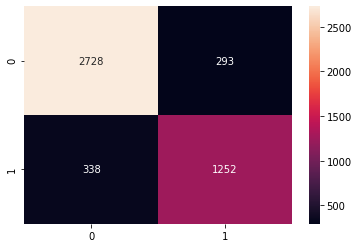

In [43]:
cm = confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [42]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
y_svc = svc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_svc,target_names = ['échec(Class 0)','succès (Class 1)']))

0.6667751030145305
                  precision    recall  f1-score   support

  échec(Class 0)       0.67      0.99      0.80      3021
succès (Class 1)       0.71      0.06      0.10      1590

        accuracy                           0.67      4611
       macro avg       0.69      0.52      0.45      4611
    weighted avg       0.68      0.67      0.56      4611



<AxesSubplot:>

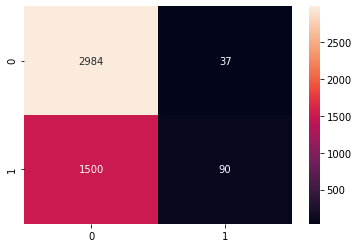

In [44]:
cm = confusion_matrix(y_test,svc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=1, random_state=42)
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
y_dtc = dtc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_dtc,target_names = ['échec(Class 0)','succès (Class 1)']))

0.650997614400347
                  precision    recall  f1-score   support

  échec(Class 0)       0.66      1.00      0.79      3021
succès (Class 1)       0.00      0.00      0.00      1590

        accuracy                           0.66      4611
       macro avg       0.33      0.50      0.40      4611
    weighted avg       0.43      0.66      0.52      4611



<AxesSubplot:>

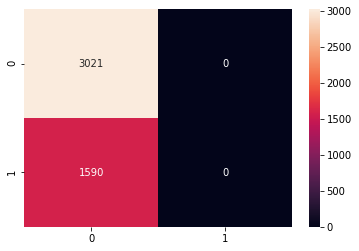

In [46]:
cm = confusion_matrix(y_test,dtc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
y_gnb = gnb.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_gnb,target_names = ['échec(Class 0)','succès (Class 1)']))

0.6463890696161353
                  precision    recall  f1-score   support

  échec(Class 0)       0.67      0.92      0.77      3021
succès (Class 1)       0.44      0.12      0.19      1590

        accuracy                           0.64      4611
       macro avg       0.55      0.52      0.48      4611
    weighted avg       0.59      0.64      0.57      4611



<AxesSubplot:>

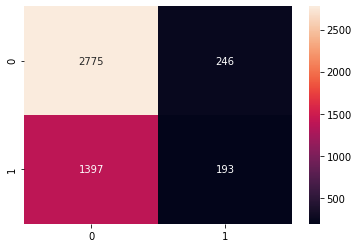

In [48]:
cm = confusion_matrix(y_test,gnb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
y_rfc = rfc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rfc,target_names = ['échec(Class 0)','succès (Class 1)']))

1.0
                  precision    recall  f1-score   support

  échec(Class 0)       0.95      0.98      0.97      3021
succès (Class 1)       0.96      0.90      0.93      1590

        accuracy                           0.95      4611
       macro avg       0.96      0.94      0.95      4611
    weighted avg       0.95      0.95      0.95      4611



<AxesSubplot:>

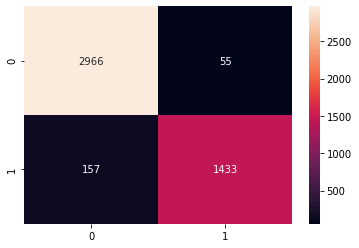

In [50]:
cm = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
y_gbc = gbc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_gbc,target_names = ['échec(Class 0)','succès (Class 1)']))

0.7073302971155931
                  precision    recall  f1-score   support

  échec(Class 0)       0.70      0.96      0.81      3021
succès (Class 1)       0.75      0.21      0.32      1590

        accuracy                           0.70      4611
       macro avg       0.72      0.58      0.57      4611
    weighted avg       0.71      0.70      0.64      4611



In [52]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_gbc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.70      0.96      0.21      0.81      0.44      0.21      3021
          1       0.75      0.21      0.96      0.32      0.44      0.18      1590

avg / total       0.71      0.70      0.47      0.64      0.44      0.20      4611



<AxesSubplot:>

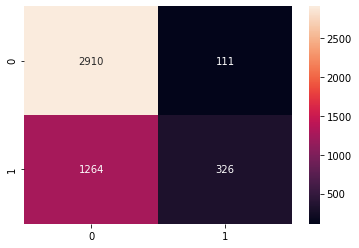

In [54]:
cm = confusion_matrix(y_test,gbc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [55]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
y_clf = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf,target_names = ['échec(Class 0)','succès (Class 1)']))

0.7073302971155931
                  precision    recall  f1-score   support

  échec(Class 0)       0.76      0.85      0.80      3021
succès (Class 1)       0.62      0.48      0.54      1590

        accuracy                           0.72      4611
       macro avg       0.69      0.66      0.67      4611
    weighted avg       0.71      0.72      0.71      4611



<AxesSubplot:>

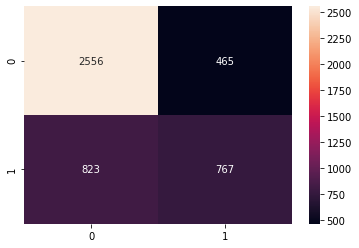

In [56]:
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [59]:
import xgboost as xgb
from xgboost import XGBClassifier
import time

In [65]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }  
xgb = XGBClassifier(**params)
test = xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test, preds) * 100))

[11:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for model 3: 85.27


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds,target_names = ['échec(Class 0)','succès (Class 1)']))

                  precision    recall  f1-score   support

  échec(Class 0)       0.86      0.92      0.89      3021
succès (Class 1)       0.83      0.72      0.77      1590

        accuracy                           0.85      4611
       macro avg       0.85      0.82      0.83      4611
    weighted avg       0.85      0.85      0.85      4611



In [ ]:
df.head(340)

In [ ]:
print(len(df.index))   # Nombre de lignes (équivalent de nrow sous R)



In [ ]:
df.iloc[340:500,:]

In [ ]:

df.loc[df['DateMandatInstant'] == 500]